In [ ]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
])

In [ ]:
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=test_transform)

In [ ]:
train = DataLoader(train_data, batch_size=64, shuffle=True)
test = DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

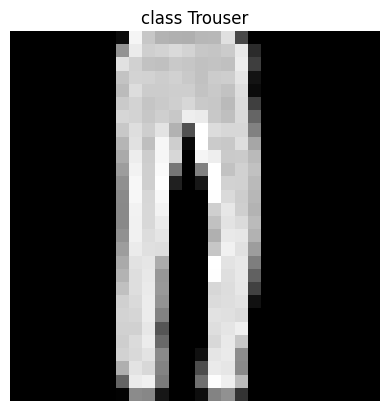

In [ ]:
class_label = train_data.classes

image, label = next(iter(train))
plt.imshow(image[3].squeeze(), cmap='gray')
plt.title(f'class {class_label[label[3].item()]}')
plt.axis('off')
plt.show()

In [ ]:
class CheckImage(nn.Module):
  def __init__(self):
    super().__init__()
    self.covn = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),


    )
    self.fc = nn.Sequential(
        nn.Flatten(),
        nn.Linear(64 * 7 * 7, 128),
        nn.ReLU(),
        nn.Linear(128, 10),
    )
  def forward(self, x):
    x = self.covn(x)
    x = self.fc(x)
    return x

model = CheckImage().to(device)

In [ ]:
# class CheckImage(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.covn = nn.Sequential(
#         nn.Conv2d(1, 32, kernel_size=3, padding=1),
#         nn.ReLU(),
#         nn.MaxPool2d(2),
#         nn.Dropout(0.25),
#         nn.Conv2d(32, 64, kernel_size=3, padding=1),
#         nn.ReLU(),
#         nn.MaxPool2d(2),
#         nn.Dropout(0.25),

#     )
#     self.fc = nn.Sequential(
#         nn.Flatten(),
#         nn.Linear(64 * 7 * 7, 128),
#         nn.ReLU(),
#         nn.Dropout(0.25),
#         nn.Linear(128, 10),
#     )
#   def forward(self, x):
#     x = self.covn(x)
#     x = self.fc(x)
#     return x

# model = CheckImage().to(device)

In [ ]:
cross = nn.CrossEntropyLoss()
optimaze = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10

for epoch in range(epochs):
  model.train()
  total_loss = 0
  for x_batch, y_batch in train:
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)

    y_pred = model(x_batch)
    loss = cross(y_pred, y_batch)

    optimaze.zero_grad()
    loss.backward()
    optimaze.step()

    total_loss += loss.item()
  print(f'Эпоха {epoch + 1}, потери {round(total_loss, 2)}')

Эпоха 1, потери 498.38
Эпоха 2, потери 329.96
Эпоха 3, потери 288.06
Эпоха 4, потери 259.21
Эпоха 5, потери 239.26
Эпоха 6, потери 224.59
Эпоха 7, потери 212.72
Эпоха 8, потери 200.11
Эпоха 9, потери 191.22
Эпоха 10, потери 184.73


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for x_batch, y_batch in test:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_pred = model(x_batch)
        predicted = torch.argmax(y_pred, dim=1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f'Точность модели на тестовых данных: {accuracy:.2f}%')

Точность модели на тестовых данных: 91.80%


In [ ]:
torch.save(model.state_dict(), "model_v4.pth")